In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [34]:
df=pd.read_csv('datasets/Features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   duration          100 non-null    float64
 3   energy            100 non-null    float64
 4   key               100 non-null    int64  
 5   loudness          100 non-null    float64
 6   mode              100 non-null    int64  
 7   speechiness       100 non-null    float64
 8   acousticness      100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  valence           100 non-null    float64
 12  tempo             100 non-null    float64
 13  danceability      100 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.1+ KB


In [35]:
# Check for duplicate values
print(df.duplicated().sum())

0


In [36]:
print(f' Missing values:\n{df.isnull().sum()}')

 Missing values:
id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64


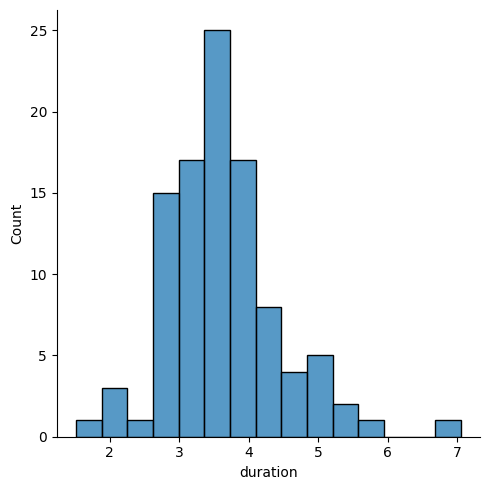

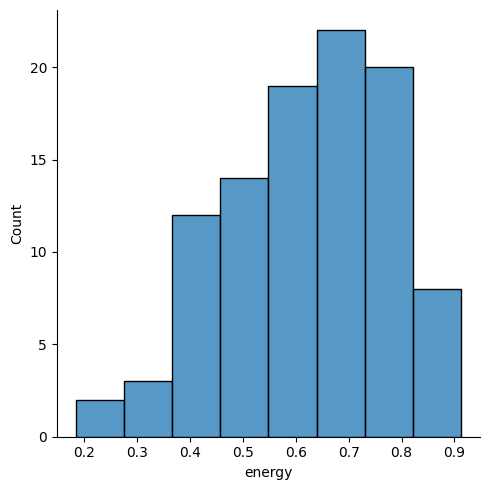

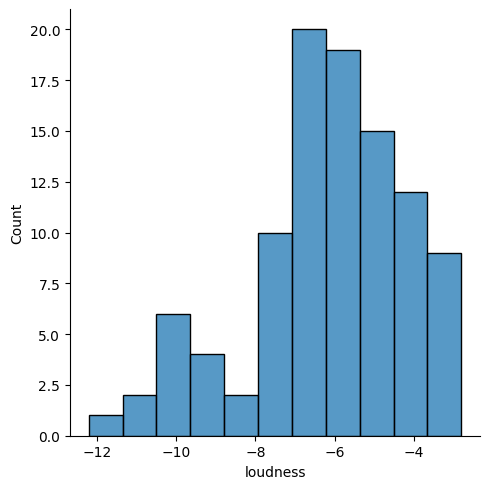

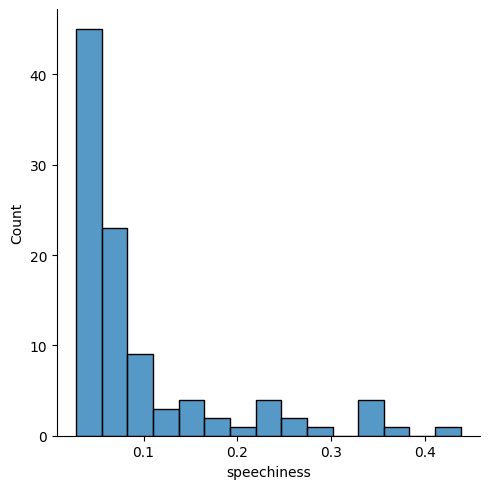

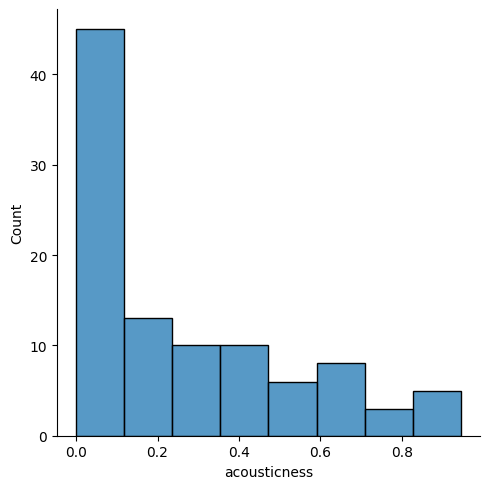

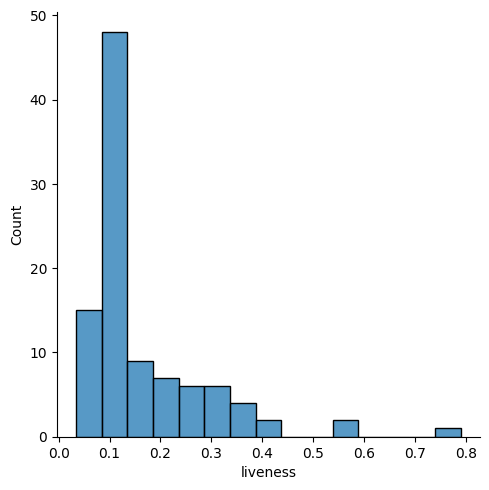

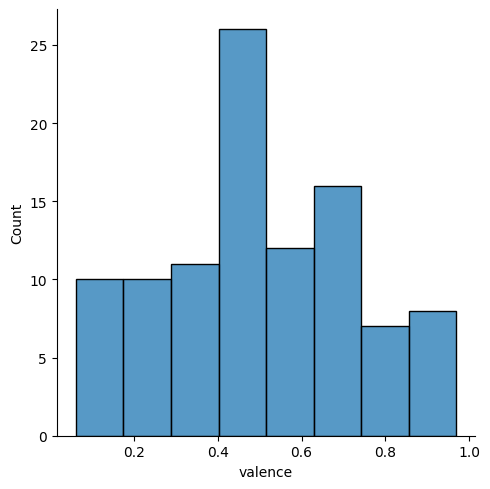

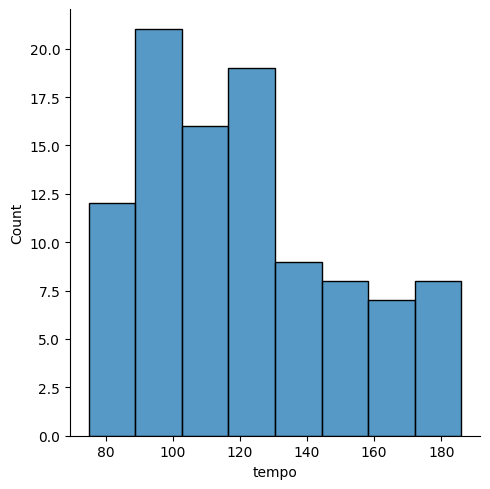

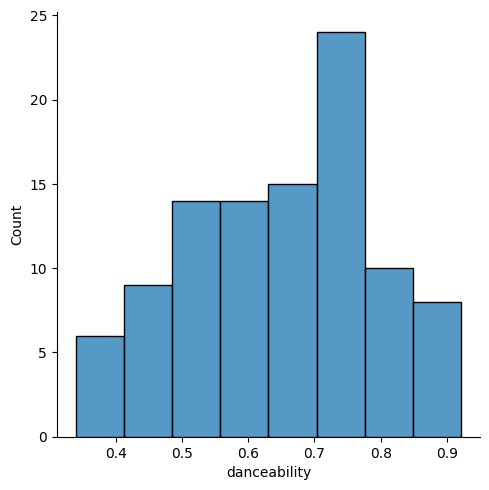

In [37]:
# Explore the distribution of each variable
sns.displot(df, x='duration')
plt.show()

sns.displot(df, x='energy')
plt.show()

sns.displot(df, x='loudness')
plt.show()

sns.displot(df, x='speechiness')
plt.show()

sns.displot(df, x='acousticness')
plt.show()

sns.displot(df, x='liveness')
plt.show()

sns.displot(df, x='valence')
plt.show()

sns.displot(df, x='tempo')
plt.show()

sns.displot(df, x='danceability')
plt.show()

In [38]:
# Calculate summary statistics
summary = df.describe()

# Calculate the mode for each variable
mode = df.mode()

In [39]:
print(summary)

         duration      energy         key   loudness        mode  speechiness  \
count  100.000000  100.000000  100.000000  100.00000  100.000000   100.000000   
mean     3.635300    0.625500    5.340000   -6.17631    0.650000     0.096448   
std      0.807997    0.160045    3.627114    2.00858    0.479372     0.088872   
min      1.520000    0.185000    0.000000  -12.20500    0.000000     0.028100   
25%      3.122500    0.523750    2.000000   -7.10375    0.000000     0.041200   
50%      3.505000    0.640000    6.000000   -5.97150    1.000000     0.059400   
75%      4.030000    0.741000    8.250000   -4.94075    1.000000     0.106000   
max      7.050000    0.912000   11.000000   -2.81000    1.000000     0.438000   

       acousticness  instrumentalness    liveness     valence       tempo  \
count    100.000000        100.000000  100.000000  100.000000  100.000000   
mean       0.260955          0.007848    0.165682    0.502032  121.253900   
std        0.272764          0.048977  

In [40]:
print(mode)

                        id              name  duration  energy  key  loudness  \
0   6UelLqGlWMcVH1E5c4H7lY  'Till I Collapse      2.90   0.816  1.0    -4.209   
1                      NaN           7 Rings      3.49     NaN  NaN       NaN   
2                      NaN           7 Years      3.90     NaN  NaN       NaN   
3                      NaN         All of Me       NaN     NaN  NaN       NaN   
4                      NaN         As It Was       NaN     NaN  NaN       NaN   
..                     ...               ...       ...     ...  ...       ...   
95                     NaN  Watermelon Sugar       NaN     NaN  NaN       NaN   
96                     NaN        Without Me       NaN     NaN  NaN       NaN   
97                     NaN        Wonderwall       NaN     NaN  NaN       NaN   
98                     NaN     XO Tour Llif3       NaN     NaN  NaN       NaN   
99                     NaN            Yellow       NaN     NaN  NaN       NaN   

    mode  speechiness  acou

In [41]:
# Calculate the correlation matrix
corr_matrix = df.corr()

/var/folders/1p/1tgvxck50fx242v32s0pd9d80000gn/T/ipykernel_12841/2928113133.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



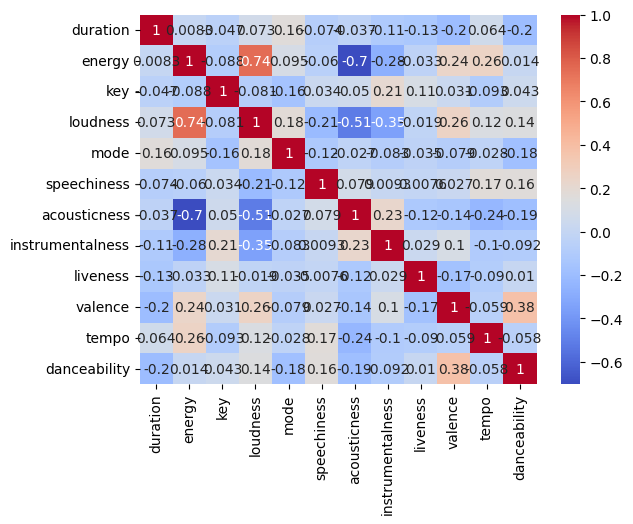

<Figure size 1200x800 with 0 Axes>

In [70]:

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(12,8))
plt.show()

In [71]:

# Check the correlation between loudness and energy
loudness_energy_corr = df['loudness'].corr(df['energy'])
print("Correlation between loudness and energy:", loudness_energy_corr)

Correlation between loudness and energy: 0.7417935029873552


the correlation coefficient between loudness and energy is approximately 0.742, which suggests a strong positive correlation between the two variables. This means that as the energy of a song increases, so does its loudness

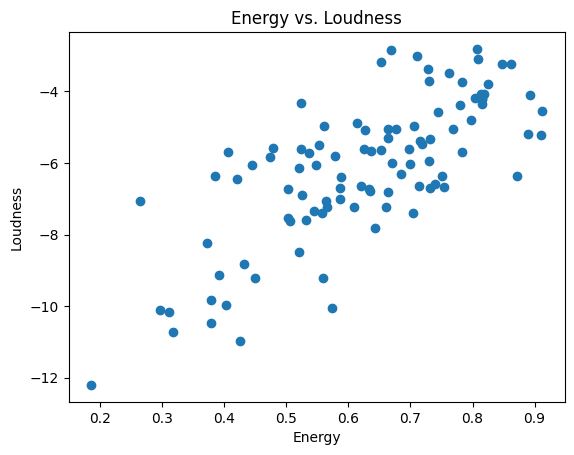

In [72]:
# Create a scatter plot of energy vs. loudness
plt.scatter(df['energy'], df['loudness'])
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs. Loudness')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



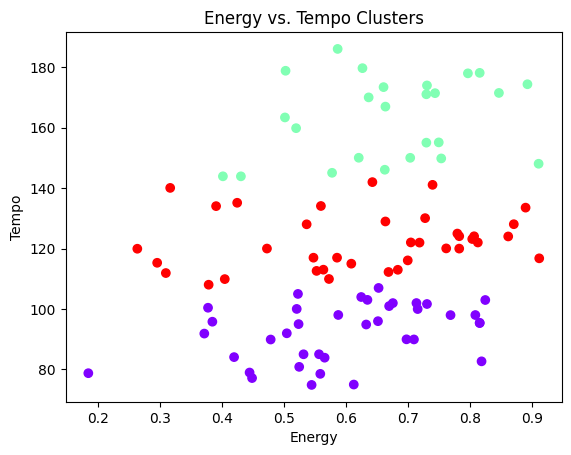

In [73]:
from sklearn.cluster import KMeans


# Select the features to be used for clustering
X = df[['energy', 'tempo', 'acousticness']]

# Instantiate the KMeans algorithm with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the algorithm to the data
kmeans.fit(X)

# Add a new column to the DataFrame with the cluster labels
df['cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.title('Energy vs. Tempo Clusters')
plt.show()


In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,2:])

# Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to original dataframe
df['cluster'] = kmeans.labels_


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [76]:
import plotly.express as px

# Selecting relevant columns
df_clustering = df[['id', 'name', 'duration', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']]

# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering.iloc[:,2:])

# Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to original dataframe
df_clustering['cluster'] = kmeans.labels_

# Visualizing clusters using plotly scatter plot
fig = px.scatter_3d(df_clustering, x='energy', y='loudness', z='tempo', color='cluster', hover_name='name', hover_data=['duration', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'danceability'])
fig.show()


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

